# Kaggle challenge Titanic

### 1.Set up Google colaboratory environment

In [1]:
# #mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd "/content/drive/My Drive/Kaggle"
# !pwd

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [4]:
# !chmod 600 /root/.kaggle/kaggle.json
!ls

kaggle_titanic.ipynb


In [5]:
#%cd kaggle_titanic/data/raw/
#!kaggle competitions download -c titanic
#Changing work directory
# %cd kaggle_titanic/
%cd ../

/home/cristiankamia/kaggle/kaggle_titanic


In [6]:
# !pip install -U seaborn
#!pip freeze > requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# read datasets

train_df = pd.read_csv("./data/raw/train.csv")
test_df = pd.read_csv("./data/raw/test.csv")

##2.Evaluationary Data Analysis

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
def missing_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns



In [10]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [11]:
missing_table(test_df)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


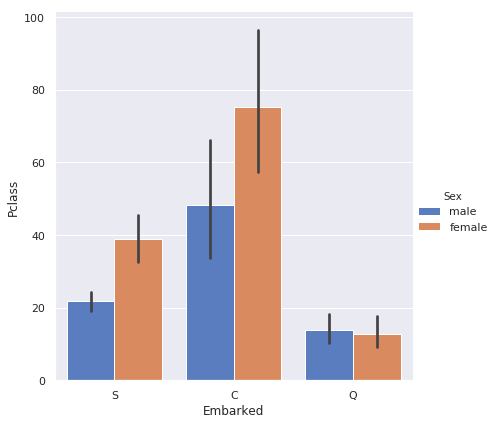

In [13]:
plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=train_df,
                height=6, kind="bar", palette="muted")
plot.set_ylabels("Pclass")

plt.show()

In [14]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

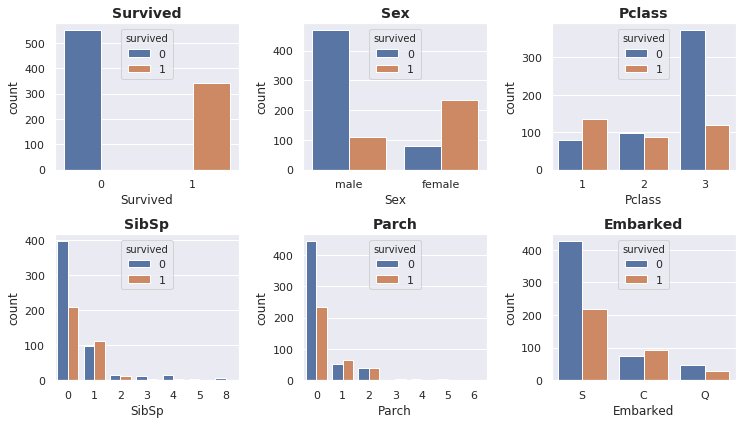

In [16]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(train_df[cols[i]], hue=train_df["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()   

## Seaborn Distplots 
### Distribution of Age as function of Pclass, Sex and Survived

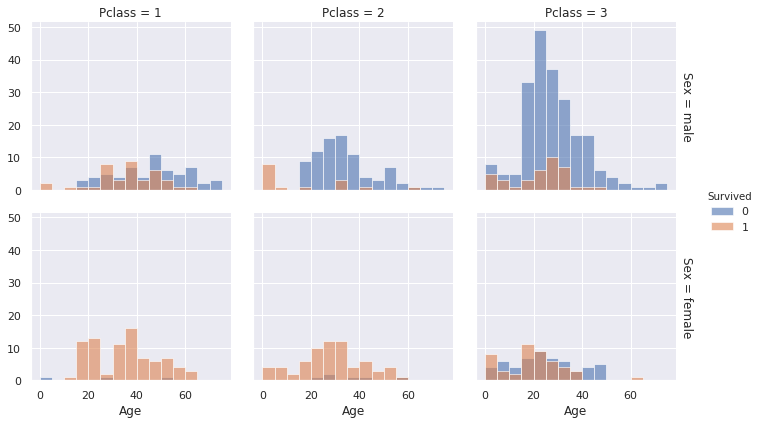

In [17]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

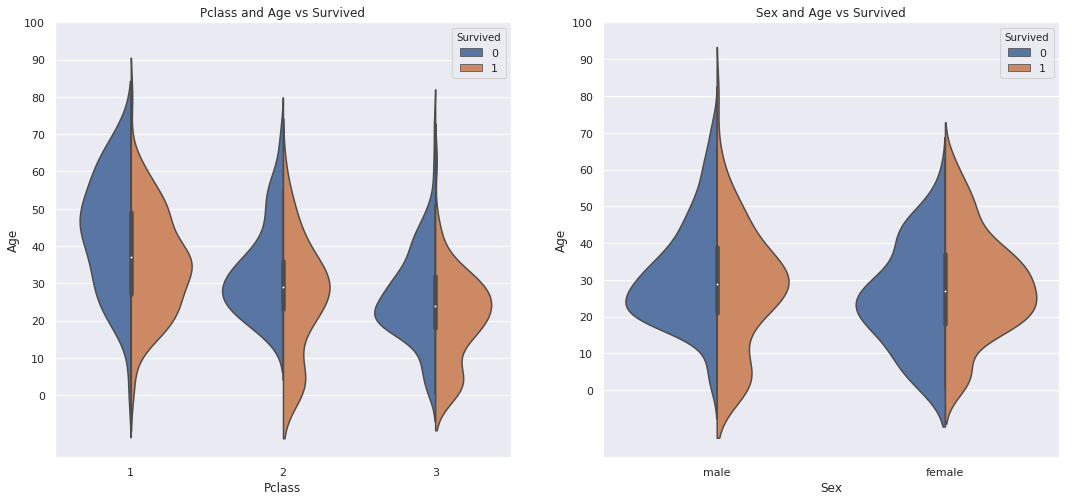

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

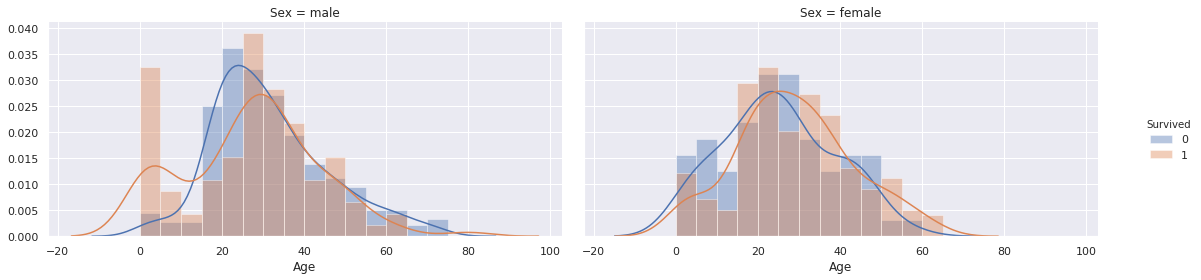

In [19]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(train_df, col='Sex', hue='Survived', margin_titles=True, height=4, aspect=2.0)
g.map(sns.distplot, 'Age', kde=True, bins=bins, hist=True)
g.add_legend()  
plt.show()  

In [20]:
train_df['Fare'].max()

512.3292

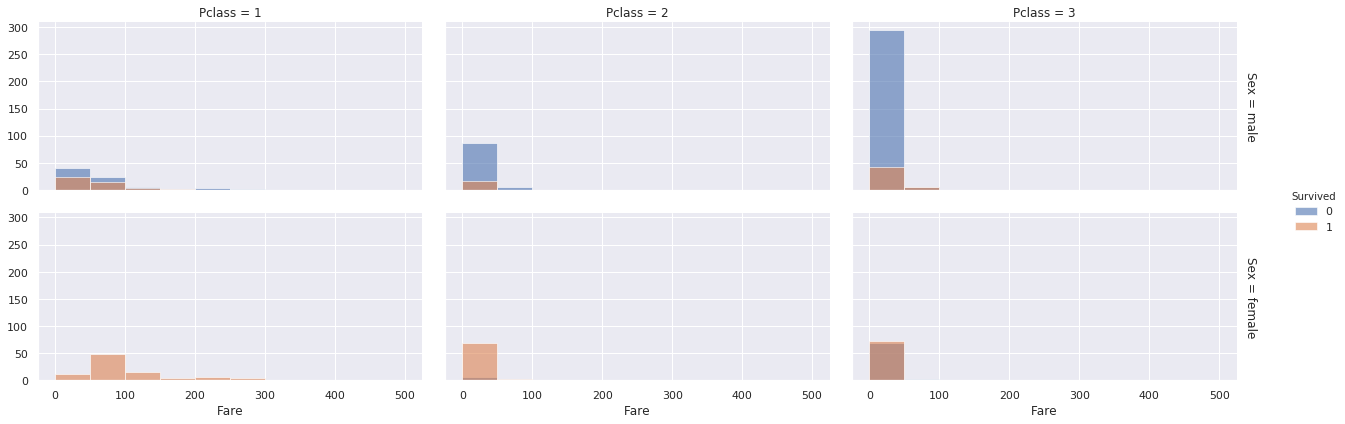

In [21]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(train_df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=2.0)
g.map(sns.distplot, 'Fare', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

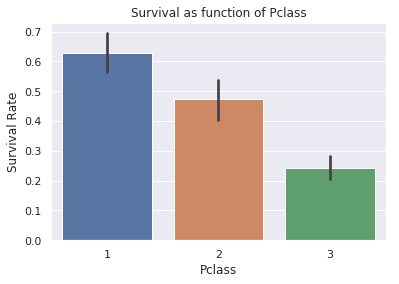

In [22]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

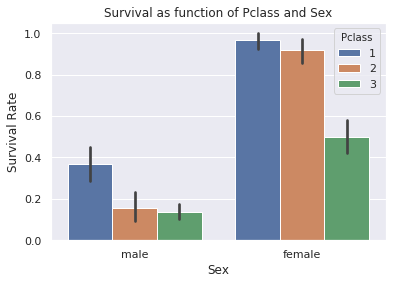

In [23]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

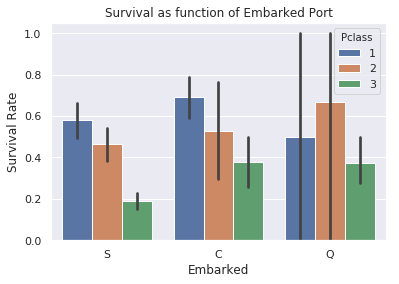

In [24]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

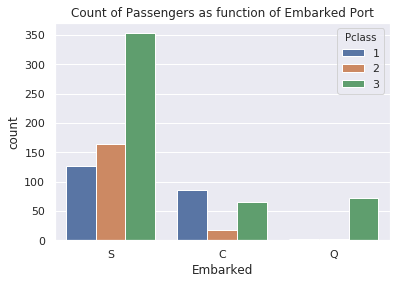

In [25]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

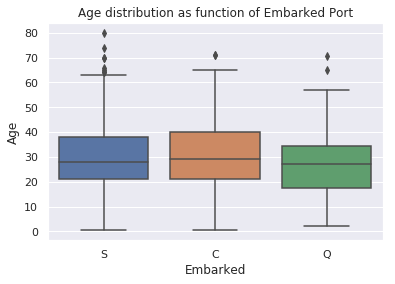

In [26]:
sns.boxplot(x='Embarked', y='Age', data=train_df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


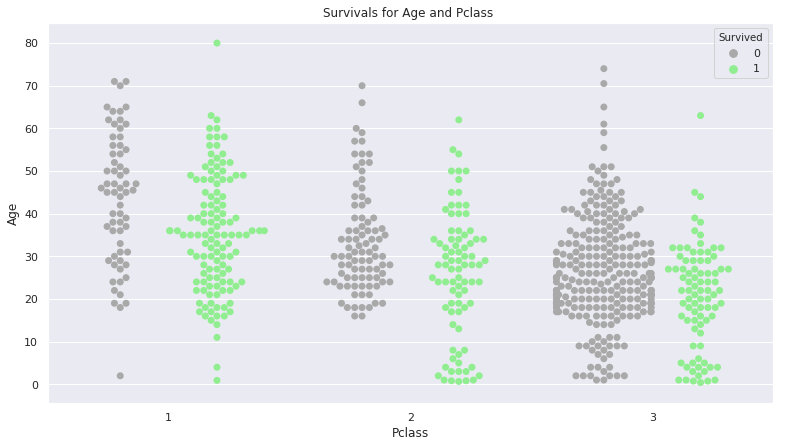

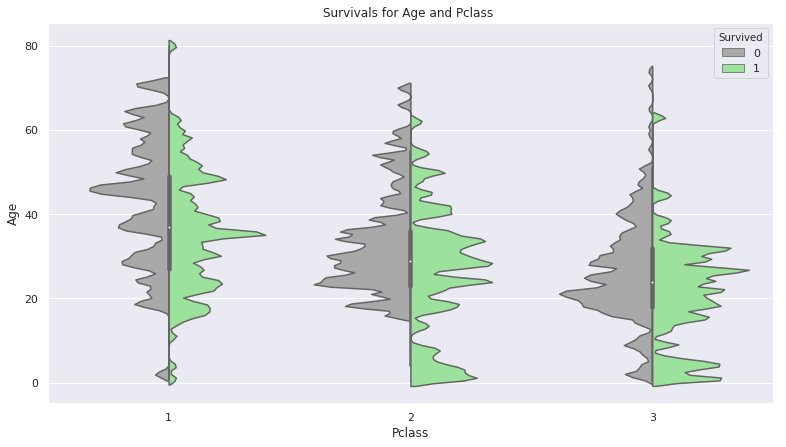

In [27]:
#choose color
cm_surv = ["darkgrey" , "lightgreen"]

#plot swarm
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train_df , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

#plot violin
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train_df, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

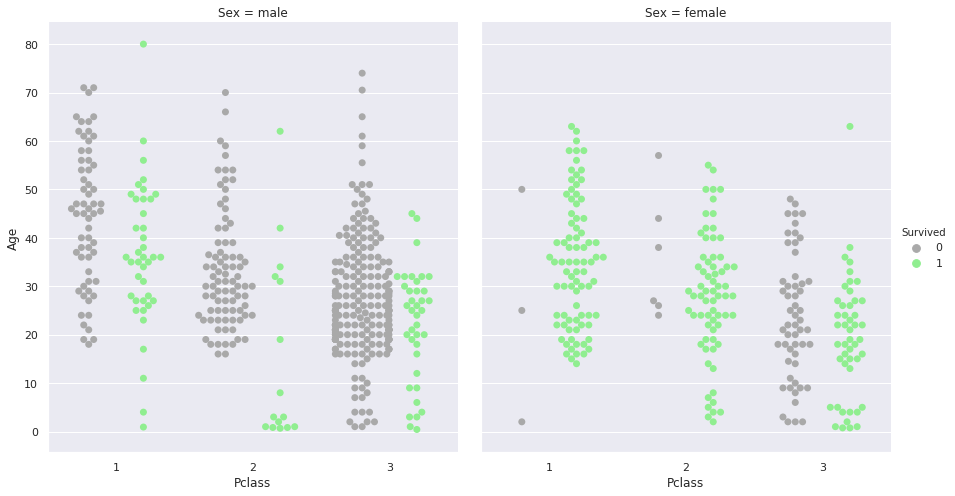

In [28]:
g = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_df, kind="swarm", dodge=True, palette=cm_surv, height=7, aspect=.9, s=7)

##3.Feature Engineering & Data preprocessing
###3.1 Feature Engineering

In [29]:
for df in [train_df, test_df] :
    #Add columm FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    #Add columm Alone 
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
 

In [30]:
for df in [train_df, test_df] :
    df['Age_band']=0
    df.loc[df['Age']<=16,'Age_band']=0
    df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
    df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
    df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
    df.loc[df['Age']>64,'Age_band']=4

In [31]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,2


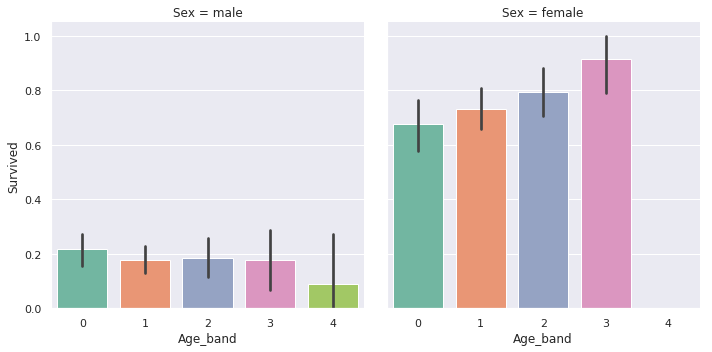

In [32]:
sns.catplot(x='Age_band',y='Survived',data=train_df,col='Sex', kind="bar", palette="Set2")
plt.show()


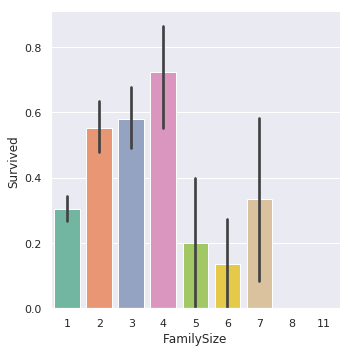

In [33]:
sns.catplot(x='FamilySize', y="Survived", data=train_df, kind='bar', palette='Set2')
plt.show()

In [34]:
for df in [train_df, test_df] :
    for i in df:
        df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations


In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Age_band,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,2,Mr


In [36]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


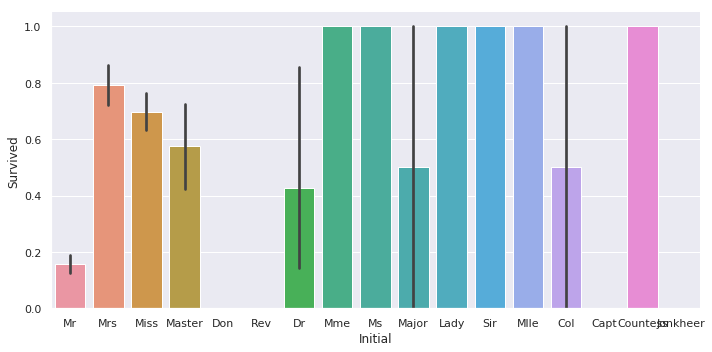

In [37]:
sns.catplot(x="Initial",y="Survived",data=train_df, kind="bar", aspect=2.0)

In [38]:
for df in [train_df, test_df]:
    df['Initial'].replace(['Mlle','Mme','Ms','Major','Lady','Countess','Jonkheer','Col','Rev','Sir','Don','Dona','Capt','Dr'],['Miss','Miss','Miss','Other','Other','Other','Other','Other','Other','Mr','Mr','Mr','Other','Other'],inplace=True)

In [39]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,125,3
male,40,0,519,0,18


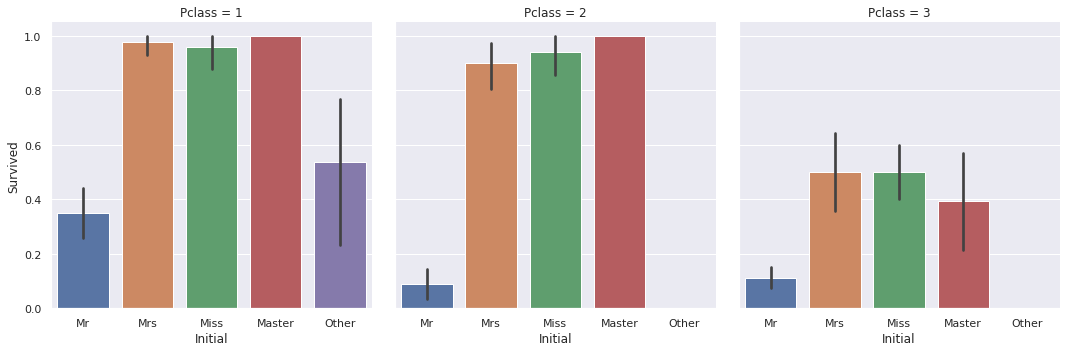

In [40]:
sns.catplot(x='Initial', y="Survived", data=train_df , kind="bar", col="Pclass")

In [41]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [42]:
for df in [train_df, test_df] :
    df['Name_length'] = df['Name'].apply(len) #get len of names

In [43]:
name_len = train_df[['Name_length', 'Survived']].groupby(['Name_length'], as_index=False).mean().sort_values(by='Survived', ascending=False)

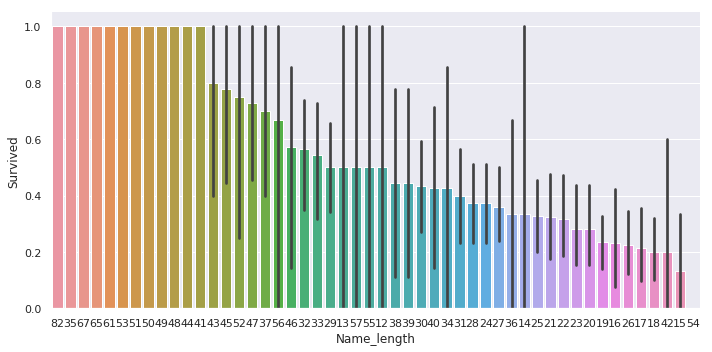

In [44]:
sns.catplot(x='Name_length', y="Survived", data=train_df , kind="bar", order=name_len['Name_length'], aspect=2)

In [45]:
for data in [train_df, test_df]:
    data['Fare_Range']=pd.qcut(data['Fare'], 8, labels=False, ) # With 'labesl=False' we could create a Fare_range column without splitting the categories as like next cell
  
    
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
0,0.207143
1,0.180723
2,0.198198
3,0.40708
4,0.436364
5,0.473214
6,0.481818
7,0.678571


In [46]:
# for data in [train_df, test_df]:
#     data['Fare_cat']=0
#     data.loc[data['Fare']<=7.91,'Fare_cat']=0
#     data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
#     data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
#     data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3
train_df = train_df.astype({'Fare_Range': float})
train_df.Fare_Range.dtype

dtype('float64')

In [47]:
missing_table(test_df)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [48]:
for data in [train_df, test_df]:
    data['Ticket_Len'] = data['Ticket'].apply(len)
    #Getting the first letter of the column
    data['Ticket_Letter'] = data['Ticket'].str[0]

In [49]:
ticket_len = train_df[['Ticket_Len', 'Survived']].groupby(['Ticket_Len'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ticket_letter = train_df[['Ticket_Letter', 'Survived']].groupby(['Ticket_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [50]:
ticket_len

,Ticket_Len,Survived
2,5,0.618321
5,8,0.539474
13,17,0.428571
9,12,0.400000
10,13,0.400000
1,4,0.366337
7,10,0.341463
11,15,0.333333
3,6,0.319809
4,7,0.296296


In [51]:
train_df.groupby(['Ticket_Len'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Ticket_Len,
3,0
4,0.366337
5,0.618321
6,0.319809
7,0.296296
8,0.539474
9,0.192308
10,0.341463
11,0.25


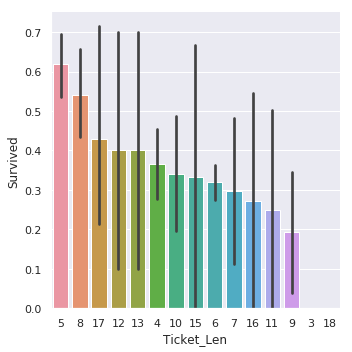

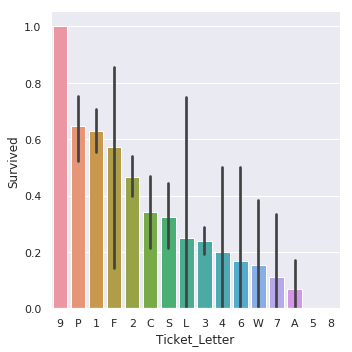

In [52]:
sns.catplot(x='Ticket_Len', y="Survived", data=train_df , kind="bar", order=ticket_len['Ticket_Len'])
sns.catplot(x='Ticket_Letter', y="Survived", data=train_df, kind="bar", order=ticket_letter['Ticket_Letter'])


In [53]:
all_df = pd.concat([train_df, test_df])
#Displaying values counts
print(all_df['Ticket_Letter'].value_counts())

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket_Letter, dtype: int64


/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [54]:
for data in [train_df, test_df]:
    data['Ticket_Letter'] = data['Ticket_Letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Surv')
    data['Ticket_Letter'] = data['Ticket_Letter'].replace(['F', '9'], 'Rare_High_Surv')

In [55]:
#Cabin 
for data in [train_df, test_df]:
  #Filling missing values
  data.Cabin = data.Cabin.fillna('N0')
  #Getting the first letter of the column
  data['Cabin_Letter'] = data['Cabin'].str[0]

#we not have T at test data so we replace it 
train_df['Cabin_Letter'] = train_df['Cabin_Letter'].replace(['T'], 'N')

/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


N    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin_Letter, dtype: int64


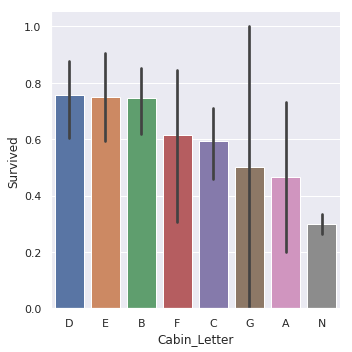

In [56]:
all_df = pd.concat([train_df, test_df])

print(all_df['Cabin_Letter'].value_counts())
cabin_letter = train_df[['Cabin_Letter', 'Survived']].groupby(['Cabin_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='Cabin_Letter', y="Survived", data=train_df, kind="bar", order=cabin_letter['Cabin_Letter'])

In [57]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Alone,Age_band,Initial,Name_length,Fare_Range,Ticket_Len,Ticket_Letter,Cabin_Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,2,0,1,Mr,23,0.0,9,A,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,2,0,2,Mrs,51,7.0,8,P,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,1,1,Miss,22,2.0,16,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,2,0,2,Mrs,44,6.0,6,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,1,2,Mr,24,2.0,6,3,N
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,1,1,0,Mr,16,2.0,6,3,N
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,1,1,3,Mr,23,6.0,5,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,5,0,0,Master,30,4.0,6,3,N
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,3,0,1,Mrs,49,3.0,6,3,N
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,2,0,0,Mrs,35,5.0,6,2,N


In [58]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [59]:
for df in [train_df, test_df]:

    # Age: use Initial to fill missing values
    df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']= df.Age[df.Initial=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']= df.Age[df.Initial=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']= df.Age[df.Initial=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']= df.Age[df.Initial=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']= df.Age[df.Initial=="Other"].mean()
    df = df.drop('Name', axis=1)
    
    # Fare: use Pclass to fill fare
    df.loc[(df.Fare_Range.isnull())&(df.Pclass==1),'Fare_Range'] = df.Fare_Range[df.Pclass==1].mode()
    df.loc[(df.Fare_Range.isnull())&(df.Pclass==2),'Fare_Range'] = df.Fare_Range[df.Pclass==2].mode()
    df.loc[(df.Fare_Range.isnull())&(df.Pclass==3),'Fare_Range'] = df.Fare_Range[df.Pclass==3].mode()
    

# Embarked
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode().iloc[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode().iloc[0])

    

In [60]:
missing_table(train_df)

,欠損数,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [61]:
#removing all columns that we don't need
train_df.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','Parch', 'SibSp', 'Name_length'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','Ticket', 'Cabin','Fare','Age','Parch', 'SibSp', 'Name_length'],axis=1,inplace=True)

In [62]:
#handling categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass', 'Initial','Ticket_Letter','Cabin_Letter','Fare_Range'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass', 'Initial','Ticket_Letter','Cabin_Letter','Fare_Range'], drop_first=True)

In [63]:
test_df.columns

Index(['FamilySize', 'Alone', 'Age_band', 'Ticket_Len', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Initial_Miss',
       'Initial_Mr', 'Initial_Mrs', 'Initial_Other', 'Ticket_Letter_2',
       'Ticket_Letter_3', 'Ticket_Letter_A', 'Ticket_Letter_C',
       'Ticket_Letter_P', 'Ticket_Letter_Rare_High_Surv',
       'Ticket_Letter_Rare_Low_Surv', 'Ticket_Letter_S', 'Cabin_Letter_B',
       'Cabin_Letter_C', 'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F',
       'Cabin_Letter_G', 'Cabin_Letter_N', 'Fare_Range_1.0', 'Fare_Range_2.0',
       'Fare_Range_3.0', 'Fare_Range_4.0', 'Fare_Range_5.0', 'Fare_Range_6.0',
       'Fare_Range_7.0'],
      dtype='object')

In [64]:
train_df.columns

Index(['Survived', 'FamilySize', 'Alone', 'Age_band', 'Ticket_Len', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Initial_Miss',
       'Initial_Mr', 'Initial_Mrs', 'Initial_Other', 'Ticket_Letter_2',
       'Ticket_Letter_3', 'Ticket_Letter_A', 'Ticket_Letter_C',
       'Ticket_Letter_P', 'Ticket_Letter_Rare_High_Surv',
       'Ticket_Letter_Rare_Low_Surv', 'Ticket_Letter_S', 'Cabin_Letter_B',
       'Cabin_Letter_C', 'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F',
       'Cabin_Letter_G', 'Cabin_Letter_N', 'Fare_Range_1.0', 'Fare_Range_2.0',
       'Fare_Range_3.0', 'Fare_Range_4.0', 'Fare_Range_5.0', 'Fare_Range_6.0',
       'Fare_Range_7.0'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(train_df.drop(['Survived'],axis=1))
scaled_features = scaler.transform(train_df.drop(['Survived'],axis=1))
train_df_sc = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])


# scaler.fit(df_test_ml)
scaled_features = scaler.transform(test_df)
test_df_sc = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [66]:
train_df

,Survived,FamilySize,Alone,Age_band,Ticket_Len,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,...,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_N,Fare_Range_1.0,Fare_Range_2.0,Fare_Range_3.0,Fare_Range_4.0,Fare_Range_5.0,Fare_Range_6.0,Fare_Range_7.0
0,0,2,0,1,9,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,2,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,16,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
3,1,2,0,2,6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,2,6,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
5,0,1,1,0,6,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
6,0,1,1,3,5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,5,0,0,6,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
8,1,3,0,1,6,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
9,1,2,0,0,6,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [67]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_test = test_df

X_sc = train_df_sc
y_sc = train_df['Survived']
X_test_sc = test_df_sc

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

from sklearn.metrics import accuracy_score

In [69]:
from sklearn.model_selection import cross_val_score
cross_validation_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [70]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc = cross_val_score(svc, X, y, cv=cross_validation_split, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.84328358 0.81716418 0.82835821 0.80597015 0.82835821 0.83208955
 0.81343284 0.82462687 0.84701493 0.86940299]
0.8309701492537312


In [71]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=cross_validation_split, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.80970149 0.81716418 0.78731343 0.83208955 0.82089552 0.80970149
 0.80223881 0.80223881 0.83208955 0.85447761]
0.8167910447761194


In [72]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=cross_validation_split, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

[0.80597015 0.81343284 0.79850746 0.82089552 0.81716418 0.77985075
 0.81343284 0.79850746 0.83955224 0.86940299]
0.8156716417910447


/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cristiankamia/anaconda3/envs/titanic/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X_sc,y_sc,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.83165645216207


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X_sc,y_sc,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8249648167063898


In [75]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X_sc,y_sc,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8361885711043013


In [76]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True, n_jobs=-1, cv=cross_validation_split)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.2min finished


0.825
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=500, random_state=None)


In [77]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose=True, n_jobs=-1, cv=cross_validation_split)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.3min finished


0.8376865671641791
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [78]:
import lightgbm as lgb


In [79]:
import lightgbm as lgb

In [80]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [81]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
lgb_gd=GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=hyper,verbose=True, n_jobs=-1, cv=cross_validation_split)
lgb_gd.fit(X,y)
print(lgb_gd.best_score_)
print(lgb_gd.best_estimator_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   32.3s


0.8279850746268657
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   50.6s finished


In [82]:
import datetime
d = datetime.datetime.now()

y_pred = lgb_gd.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred = y_pred.ravel()
 
test_df = pd.read_csv("./data/raw/test.csv")
# for submission
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
    })
submission.to_csv('./submissions/titanic_lgb_{0:%Y%m%d-%H%M%S}_{1}.csv'.format(d,lgb_gd.best_score_), index=False)

In [83]:
y_pred = gd.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred = y_pred.ravel()
 
test_df = pd.read_csv("./data/raw/test.csv")
# for submission
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
    })
submission.to_csv('./submissions/titanic_xgb_{0:%Y%m%d-%H%M%S}_{1}.csv'.format(d,gd.best_score_), index=False)